In [130]:
# import Dependecies
import pandas as pd
import gensim.downloader as api
from gensim.models import KeyedVectors,Word2Vec
import random
from nltk.tokenize import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import numpy as np 
import random

In [131]:
# Load Synonym File
synonym_file = pd.read_csv("synonym.csv")

In [132]:
# ------------- TASK 01 --------------------
# Intialize the Model Name
model_name_1 = "word2vec-google-news-300"

In [133]:
# Load the Data model
data_model_1 = api.load(model_name_1)

In [134]:
# Helper function
def detail_helper(data_model,file_name) :
    correct_answer = 0
    guess = 0
    with open(f'{file_name}.csv','w') as file:
        file.write("question,answer,guess,label\n")
        for iter,row in synonym_file.iterrows():
            question_word = row['question']
            answer_word = row['answer']
          
            if (question_word in data_model and any(row[f'{i}'] in data_model for i in range(0,4))):
                similarities = [(row[f'{i}'], data_model.similarity(question_word, row[f'{i}'])) for i in range(0,4) if row[f'{i}'] in data_model]
                closest,_ = max(similarities, key=lambda x: x[1])
                if (closest == answer_word):
                    file.write(f'{question_word},{answer_word},{closest},correct\n')
                    correct_answer+= 1
                  
                else:
                    file.write(f'{question_word},{answer_word},{closest},wrong\n')
                    
            else:
                random_word = row[f'{random.randint(0,3)}']
                file.write(f'{question_word},{answer_word},{random_word},guess\n')
                guess += 1
    
    with open('analysis.csv','a') as analysis:
        if ((len(synonym_file) - guess) > 0):
            analysis.write(f'{file_name},{len(data_model)},{correct_answer},{len(synonym_file) - guess},{correct_answer/(len(synonym_file) - guess)}\n')
            return {'file_name' : file_name , 'length' : len(data_model),'correct_answer' : correct_answer, 'no_of_trial_without_guess' : len(synonym_file) - guess , 'accuracy' : correct_answer/ (len(synonym_file) - guess) }
        else:
            analysis.write(f'{file_name},{len(data_model)},{correct_answer},{len(synonym_file) - guess},0\n')
            
            return {'file_name' : file_name , 'length' : len(data_model),'correct_answer' : correct_answer, 'no_of_trial_without_guess' : len(synonym_file) - guess , 'accuracy' : 0}
     
        

In [135]:
# Call function to create analysis files
detail_helper(data_model_1,model_name_1)

{'file_name': 'word2vec-google-news-300',
 'length': 3000000,
 'correct_answer': 70,
 'no_of_trial_without_guess': 79,
 'accuracy': 0.8860759493670886}

In [136]:
# ----------------------- Task 2 --------------------------
# First Model -- Same Embeddings
model_name_2 = "glove-twitter-50"

In [137]:
# Load the model
data_model_2 = api.load(model_name_2)

In [138]:
# Call the Helper Function 
result_model_2 = detail_helper(data_model_2,model_name_2)

In [139]:
# Second Model -- Same Emeddings
model_name_3 = "glove-wiki-gigaword-50"

In [140]:
# Load the model
data_model_3 = api.load(model_name_3)

In [141]:
# Call the Helper
result_model_3 = detail_helper(data_model_3,model_name_3)

In [142]:
# Third Model -- Different Embedding same Corpus
model_name_4 = "glove-wiki-gigaword-200"

In [14]:
# Load the model
data_model_4 = api.load(model_name_4)

In [143]:
# Call Helper
result_model_4 = detail_helper(data_model_4,model_name_4)

In [144]:
# Fourth Model -- Different Embedding same corpus
model_name_5 = "glove-wiki-gigaword-300"

In [17]:
# load the data
data_model_5 = api.load(model_name_5)

In [145]:
# Call the Helper
result_model_5 = detail_helper(data_model_5,model_name_5)

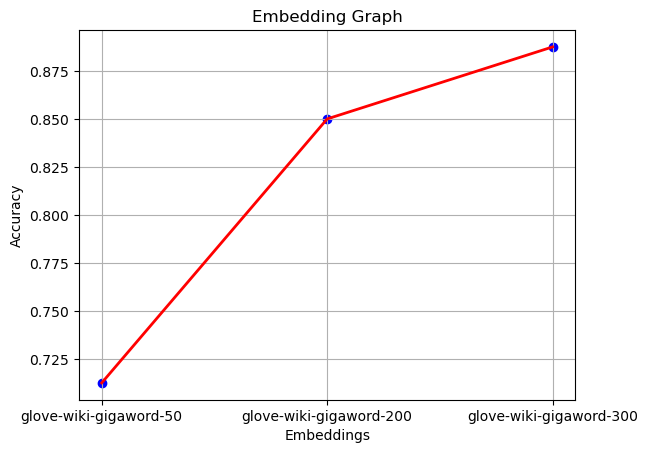

In [146]:
# TODO Analysis Random Baseline -- Human Gold Standard
# Comparision between embeddings for the same Corpus
embeddings = [model_name_3,model_name_4,model_name_5]
accuracy  = [result_model_3['accuracy'],result_model_4['accuracy'],result_model_5['accuracy']]
plt.scatter(embeddings, accuracy, label='bar', color='blue')
plt.plot(embeddings, accuracy, label='Line', color='red', linestyle='-', linewidth=2)

plt.xlabel('Embeddings')
plt.ylabel('Accuracy')
plt.title('Embedding Graph')

plt.grid(True)

plt.savefig('Task02-Embedding .png')


In [147]:
# Compute Random Accuracy
def compute_random_accuracy():
    correct_answer = 0
    for iter,row in synonym_file.iterrows():
        answer = row[random.randint(0, 3)] 
        if(row[random.randint(0, 3)] == row['answer']):
            correct_answer =+ 1
    return (correct_answer/len(synonym_file) )*100

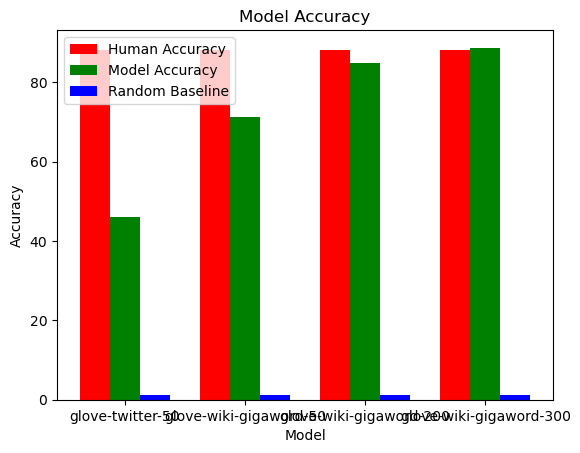

<Figure size 640x480 with 0 Axes>

In [155]:
# Comparision between Size of Dataset and its accuracy
# Statstic File Provided by the proffesor
human_accuracy = 88.28
# Random Baseline
random_accuracy = compute_random_accuracy()
N = 4
ind = np.arange(N)  
width = 0.25


xvals = [human_accuracy, human_accuracy, human_accuracy,human_accuracy] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = [result_model_2['accuracy']*100,result_model_3['accuracy']*100,result_model_4['accuracy']*100,result_model_5['accuracy']*100] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = [random_accuracy,random_accuracy,random_accuracy,random_accuracy] 
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b') 
  
plt.xlabel("Model") 
plt.ylabel('Accuracy') 
plt.title("Model Accuracy") 
  
plt.xticks(ind+width,[model_name_2,model_name_3 ,model_name_4,model_name_5]) 
plt.legend( (bar1, bar2, bar3), ('Human Accuracy', 'Model Accuracy', 'Random Baseline') ) 
plt.show() 

plt.savefig('Task02-Comparision .png')


In [149]:
#------------------------------------ Task 3 ----------------------------------
# Array of Books
book_array = ['./book1.txt','./book2.txt','./book3.txt','./book4.txt','./book5.txt','./book6.txt','./book7.txt','./book8.txt','./book9.txt','./book10.txt','./book11.txt','./book12.txt','./book13.txt','./book14.txt','./book15.txt']

In [150]:
def process_books(book_array):
    sentence_array = []
    for i in book_array:
        with open(i, 'r',encoding='utf-8') as file:
            for sentence in sent_tokenize(file.read()):
                sentence_array.append(word_tokenize(sentence))
    return sentence_array
            

In [151]:
# Define the constants
# Window Size Used
window_size = [5,10]
# Number of Embeddings
embeddings = [100,200]

In [152]:
# Train model with sentences
def train_model(sentence_array,window_size,embedding) :
    model = Word2Vec(sentence_array,vector_size=embedding,window=window_size)
    return model 

In [153]:
# Intialize the dataset 
data_set =  process_books(book_array)
trained_model = []
# Use the dataset to train the model
for i in embeddings:
    for j in window_size:
        train_model_1 = train_model(data_set,j,i)
        trained_model.append(detail_helper(train_model_1.wv,f'own-corpus-E{i}-W{j}'))

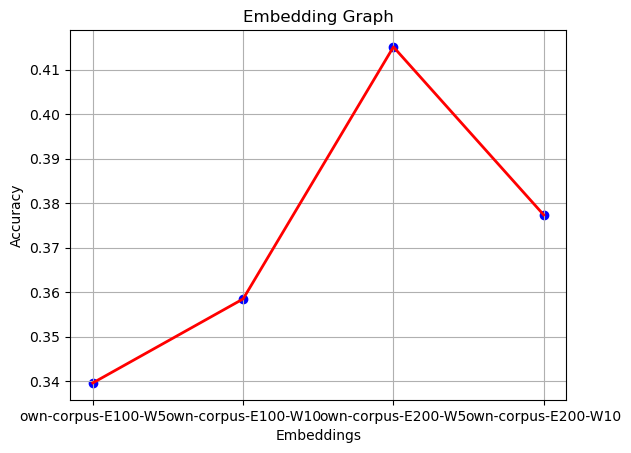

In [154]:
# Comparision of these Models
embeddings = [i['file_name'] for i in trained_model]
accuracy  = [i['accuracy'] for i in trained_model]
plt.scatter(embeddings, accuracy, label='bar', color='blue')
plt.plot(embeddings, accuracy, label='Line', color='red', linestyle='-', linewidth=2)

plt.xlabel('Embeddings')
plt.ylabel('Accuracy')
plt.title('Embedding Graph')

plt.grid(True)

plt.savefig('Task03-Accuracy .png')